# Advanced Classification Predict

© Explore Data Science Academy

## Honour Code

I **Migael Jordaan**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code (https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Import Libraries and Read In the Data

Do not modify or remove any of the code in these cells.

In [1]:
from IPython.display import Image
from IPython.display import IFrame
from IPython import display
import pandas as pd
import numpy as np

import nltk
import sklearn
import imblearn
import csv
%matplotlib inline

from nltk import TreebankWordTokenizer, SnowballStemmer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import  word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from imblearn.metrics import classification_report_imbalanced

from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import VarianceThreshold

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

import string
import urllib
import math
import re

nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Unchecked\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Unchecked\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet  
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Unchecked\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [204]:
import matplotlib.pyplot as plt
import string
from matplotlib.colors import ListedColormap

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [182]:
train  = pd.read_csv('train.csv')
test = pd.read_csv('test.csv') # no labels

train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [183]:
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


## Overview

Refer to this diagram to guide you while you build your model. Some of the steps will be fleshed out in this template.

![Overview](process_overview_final.jpg)

## Basic preprocessing

Here is a template you may use for your initial base model. 

### Removing URL's
Write a function that removes URL's from a single tweet. 

**Function input:**
- A single string object (tweet) 

**Function output:**
- The tweet with URL's removed as a single object

In [32]:
# define function that removes URL from single tweet
def remove_urls(text):
    text = re.sub(r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+', '', text)
    return text

**Original object:**

In [33]:
tweet = train['message'][2]
tweet

'RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…'

In [34]:
remove_urls(tweet)

'RT @RawStory: Researchers say we have three years to act on climate change before it’s too late  …'

**Expected output:**
```python
remove_urls(tweet)

>>'RT @RawStory: Researchers say we have three years to act on climate change before it’s too late  '
```

### Convert to lowercase

Write a function that converts a single tweet to lowercase.

**Function input:**
- A single string object (tweet) 

**Function output:**
- The tweet in lowercase as a single object

In [13]:
def to_lower(text):
    text = text.lower()
    return text

**Original object:**

In [14]:
tweet

'RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…'

In [15]:
to_lower(tweet)

'rt @rawstory: researchers say we have three years to act on climate change before it’s too late https://t.co/wdt0kdur2f https://t.co/z0anpt…'

**Expected output:**

```python 
to_lower(tweet)
>> 'rt @rawstory: researchers say we have three years to act on climate change before it’s too late https://t.co/wdt0kdur2f https://t.co/z0anpt…'
```

### Stemming or lemmatising

Write a function that derives the root words for each of the words in a tweet. You may use stemming _or_ lemmatising here.

**Function input:**
- A single string object (tweet) 

**Function output:**
- The tweet in root words as a _single_ object

In [46]:
def get_roots(text):
    stemmer = SnowballStemmer('english')
    return " ".join(stemmer.stem(word) for word in text.split(" "))

**Original object:**

In [47]:
tweet

'RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…'

In [48]:
get_roots(tweet)

'rt @rawstory: research say we have three year to act on climat chang befor it too late https://t.co/wdt0kdur2f https://t.co/z0anpt…'

**Expected output:**
```python
get_roots(tweet)
```
Using `SnowballStemmer()`
```python
>> 'rt @rawstory: research say we have three year to act on climat chang befor it too late https://t.co/wdt0kdur2f https://t.co/z0anpt…'
```

Using `WordNetLemmatizer()`
```python
>> 'RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…'
```

### Other preprocessing techniques 

Come back here once you have submitted your base model to add any other preprocessing functions yuo wish to add

In [4]:
def clean_text_new_old(text): 
    # Remove link
    text = re.sub(r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+', r'url-web', text)
    # Convert to lower case
    text = text.lower()
    
    # Remove unexpected artifacts
    text = re.sub(r'â€¦', '', text)
    text = re.sub(r'…', '', text)
    text = re.sub(r'â€™', "'", text)
    text = re.sub(r'â€˜', "'", text)
    text = re.sub(r'\$q\$', "'", text)
    text = re.sub(r'&amp;', "and", text)
    # remove non valid characters
    text = re.sub('[^A-Za-z0-9#@ ]+', "", text)
    # Stemming
    stemmer = SnowballStemmer('english')
    text = " ".join(stemmer.stem(word) for word in text.split(" "))
    
    # Remove stop words
    words = text.split()  
    stops = set(stopwords.words("english"))
    words = [w for w in words if not w in stops]
    return( " ".join(words))


### Tokenising 

Write a function that tokenises a single tweet into a list of tokens.

**Function input:**
- A single string object (tweet) 

**Function output:**
- A list of tokens (objects).

In [61]:
def get_tokens(text):
    tokeniser = TreebankWordTokenizer()
    return tokeniser.tokenize(text)

**Original object:**

In [62]:
tweet

'RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…'

In [63]:
get_tokens(tweet)

['RT',
 '@',
 'RawStory',
 ':',
 'Researchers',
 'say',
 'we',
 'have',
 'three',
 'years',
 'to',
 'act',
 'on',
 'climate',
 'change',
 'before',
 'it’s',
 'too',
 'late',
 'https',
 ':',
 '//t.co/WdT0KdUr2f',
 'https',
 ':',
 '//t.co/Z0ANPT…']

**Expected output:**
```python
get_tokens(tweet)

>> ['RT',
 '@',
 'RawStory',
 ':',
 'Researchers',
 'say',
 'we',
 'have',
 'three',
 'years',
 'to',
 'act',
 'on',
 'climate',
 'change',
 'before',
 'it’s',
 'too',
 'late',
 'https',
 ':',
 '//t.co/WdT0KdUr2f',
 'https',
 ':',
 '//t.co/Z0ANPT…']
```

Besides the preprocessing methods we've already discussed, can you think of how our data can be improved at this stage?

### Vectorising 

Use the code from the webinar to define your vecotiser. For more details on this function have a look at the `sklearn`
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html">package documentation on the function</a>. Recall that this function, unlike the others before takes an _**entire column**_ as an argument.

### Putting all the functions together 

Test your cleaning functions on a single tweet. Perform the cleaning procedure on this tweet from start to finish. Make sure the output looks as you would expect. Store the cleaned tweet in `tweet_final`. Don't worry about vectorising for now.

**_Include any other cleaning procedures you add after your base model_**

**Original object:**

In [14]:
tweet

'RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…'

In [72]:
# clean tweet from start to finish
tweet1 = remove_urls(tweet)
tweet2 = to_lower(tweet1)
tweet3 = get_roots(tweet2)
tweet_final = get_tokens(tweet3)

# cleaned tweet
tweet_final

['rt',
 '@',
 'rawstory',
 ':',
 'research',
 'say',
 'we',
 'have',
 'three',
 'year',
 'to',
 'act',
 'on',
 'climat',
 'chang',
 'befor',
 'it',
 'too',
 'late',
 '…']

**Expected output:**
```python
tweet_final
>>['rt',
 '@',
 'rawstory',
 ':',
 'research',
 'say',
 'we',
 'have',
 'three',
 'year',
 'to',
 'act',
 'on',
 'climat',
 'chang',
 'befor',
 'it',
 'too',
 'late']
```

### Preprocessing and cleaning entire column of tweets

Now that we know how to clean a single tweet, we can use `apply()` to clean the entire column in the dataframe. This is what the column looks like to begin with.

In [65]:
train['message'].head()

0    PolySciMajor EPA chief doesn't think carbon di...
1    It's not like we lack evidence of anthropogeni...
2    RT @RawStory: Researchers say we have three ye...
3    #TodayinMaker# WIRED : 2016 was a pivotal year...
4    RT @SoyNovioDeTodas: It's 2016, and a racist, ...
Name: message, dtype: object

Write code that applies your cleaning functions to the entire `message` column of the dataframe using `.apply()`. Do not vectorise just yet. Store this in a new column, `train['message_clean']`. 

In [136]:
# applying cleaning functions to entire column of dataframe (NO VECTORISING)
def clean_text(text):
    text = re.sub(r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+', '', text)
    text = text.lower()
    stemmer = SnowballStemmer('english')
    text = " ".join(stemmer.stem(word) for word in text.split(" "))
    tokeniser = TreebankWordTokenizer()
    text = tokeniser.tokenize(text)
    return text
      


0    polyscimajor epa chief doesnt think carbon dio...
1               like lack evid anthropogen global warm
2    rt @rawstori research say three year act clima...
3    #todayinmaker# wire 2016 pivot year war climat...
4    rt @soynoviodetoda 2016 racist sexist climat c...
Name: message_clean, dtype: object

In [5]:
train = train.dropna(subset=['message']) # remove any empty tweets

train['message_clean'] = train['message'].apply(clean_text_new)

#remove duplicate tweets
train = train.drop_duplicates(subset=['message_clean'])

#train['message_clean'] = train['message'].apply(get_tokens)

train['message_clean'].head()

0    polyscimajor epa chief doesnt think carbon dio...
1               like lack evid anthropogen global warm
2    rt @rawstori research say three year act clima...
3    #todayinmaker# wire 2016 pivot year war climat...
4    rt @soynoviodetoda 2016 racist sexist climat c...
Name: message_clean, dtype: object

**Expected output:**

```python
train['message_clean'].head()

>>  0    [polyscimajor, epa, chief, does, n't, think, c...
    1    [it, not, like, we, lack, evid, of, anthropoge...
    2    [rt, @, rawstory, :, research, say, we, have, ...
    3    [#, todayinmaker, #, wire, :, 2016, was, a, pi...
    4    [rt, @, soynoviodetodas, :, it, 2016, ,, and, ...
Name: message_clean, dtype: object
```

### Vectorising 

Vectorise your cleaned data using the vectoriser you defined earlier. Don't forget to fit the vectoriser to the data you just cleaned. Store your vectorised data in `train_vec`.

In [6]:
# vectorise your cleaned data
tt = TfidfVectorizer(preprocessor=list, tokenizer=list, ngram_range=(1,2), min_df=2, strip_accents = 'ascii', smooth_idf=False)
tt.fit(train['message'])
train_vec = tt.transform(train['message_clean'])


C:\Users\Unchecked\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [7]:
train_vec

<13788x6151 sparse matrix of type '<class 'numpy.float64'>'
	with 1120896 stored elements in Compressed Sparse Row format>

## Fitting a simple model on training data and evaluate its performance

Fit a model on your cleaned data. Use `train_vec` as your features. Note that you need to convert `train_vec` to an array. 

You are familiar with this process, so there is less guidance here. You may also refer to train notebooks and the webinar pdf as guidance.

Your basic model should be a logistic regression, however if you try different models you will also perform the following procedure.

1. Split the training data into features and labels.
2. Split the training data further into training and validation data.
3. Fit the model on the training subset. 
4. Predict on the validation subset.
5. Calculate the performance metrics on the validation predictions.
6. Select a model based on validation performance (when you have more than one model).
8. Clean the test data.
9. Predict on the cleaned test data.
7. Write a csv that matches `sample_submission.csv`.
8. Submit to Kaggle.

In [8]:
y = train['sentiment']
X = train_vec.toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=2022)

In [178]:
lr = LogisticRegression(solver = "liblinear", random_state = 2022)
model_lr = lr.fit(X_train, y_train)

In [179]:
y_pred_test = model_lr.predict(X_test)
y_pred_test

array([1, 1, 1, ..., 1, 1, 2], dtype=int64)

In [180]:
precision_score(y_test, y_pred_test, average = 'micro')


0.6185641769398115

In [181]:
f1_score(y_test, y_pred_test, average = 'macro')


0.45006344266695497

In [9]:
test['message_clean'] = test['message'].apply(clean_text_new)
test_vec = tt.transform(test['message_clean'])
test_data = test_vec.toarray()

In [161]:
pred_submit = model_lr.predict(test_data)

In [162]:
df_predictions = pd.DataFrame(pred_submit, columns=['sentiment'])
ids_submit = test[['tweetid']]
submit_all = pd.concat([ids_submit.reset_index(drop=True), df_predictions], axis=1)
submit_all.head()

,tweetid,sentiment
0,169760,2
1,35326,1
2,224985,1
3,476263,1
4,872928,0


In [151]:
submit_all.to_csv(r'submission.csv', index = False)

## Suggestions on how to improve the model - Extras 

Here are some ideas on how you can improve your model. Try some of them out once you have submitted your base model to Kaggle. Only use the methods you find improve your model performance.

 - Additional preprocessing 
     - Use some of the methods in the notebooks to balance the data
     - Replace links with the text `Link` to show the machine that there is a link present without the extraneous detail of the link text
     - Remove punctuation
     - Correct spelling
     - Bag of words vs. N-grams - which is better?
     - Try `TweetTokenizer()` - how does this differ from the tokenisers you are familiar with?
 - Consider which other models could do a better job (refer to course resources)
 - Consider some further feature engineering:
     - What other attributes of the tweets may be useful?
     - Should we perform feature selection given their size and sparseness of the vectorised tweets?
 - If you've mastered the above, try implementing hyperparameter tuning methods.
 - Compare all the models you try and remember to submit **the best one** based on test performance (f1-score using macro averaging). 
 
You may use the space below to try out these "Extras".

In [2]:
tweets = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
tweets.shape

(15819, 3)

In [5]:
def cleaner(tweet):
    tweet = tweet.lower()
    
    to_del = [
        r"@[\w]*",
        r"http(s?):\/\/.*\/\w*",
        r"#\w*",
        r"\d+",
        r"U+FFFD",
    ]
    for key in to_del:
        tweet = re.sub(key, "", tweet)
    
    tweet = re.sub(r"[,.;':@#?!\&/$]+\ *", " ", tweet)
    tweet = re.sub(r"\s\s+", " ", tweet)
    
    return tweet.lstrip(" ")

In [16]:
from copy import deepcopy
tweets_clean = deepcopy(tweets)
tweets_clean["message"] = tweets_clean["message"].apply(cleaner)
tweets_clean.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesn t think carbon di...,625221
1,1,it s not like we lack evidence of anthropogeni...,126103
2,2,rt researchers say we have three years to act ...,698562
3,1,wired was a pivotal year in the war on climate...,573736
4,1,rt it s and a racist sexist climate change den...,466954


In [19]:
def lemmatizer(df):
    df["length"] = df["message"].str.len()
    df["tokenized"] = df["message"].apply(word_tokenize)
    df["parts-of-speech"] = df["tokenized"].apply(nltk.tag.pos_tag)
    
    def str2wordnet(tag):
        conversion = {"J": wordnet.ADJ, "V": wordnet.VERB, "N": wordnet.NOUN, "R": wordnet.ADV}
        try:
            return conversion[tag[0].upper()]
        except KeyError:
            return wordnet.NOUN
    
    wnl = WordNetLemmatizer()
    df["parts-of-speech"] = df["parts-of-speech"].apply(
        lambda tokens: [(word, str2wordnet(tag)) for word, tag in tokens]
    )
    df["lemmatized"] = df["parts-of-speech"].apply(
        lambda tokens: [wnl.lemmatize(word, tag) for word, tag in tokens]
    )
    df["lemmatized"] = df["lemmatized"].apply(lambda tokens: " ".join(map(str, tokens)))
    
    return df

In [20]:
tweets_clean = lemmatizer(tweets_clean)
tweets_clean.head()

,sentiment,message,tweetid,length,tokenized,parts-of-speech,lemmatized
0,1,polyscimajor epa chief doesn t think carbon di...,625221,102,"[polyscimajor, epa, chief, doesn, t, think, ca...","[(polyscimajor, a), (epa, n), (chief, n), (doe...",polyscimajor epa chief doesn t think carbon di...
1,1,it s not like we lack evidence of anthropogeni...,126103,62,"[it, s, not, like, we, lack, evidence, of, ant...","[(it, n), (s, v), (not, r), (like, n), (we, n)...",it s not like we lack evidence of anthropogeni...
2,2,rt researchers say we have three years to act ...,698562,86,"[rt, researchers, say, we, have, three, years,...","[(rt, n), (researchers, n), (say, v), (we, n),...",rt researcher say we have three year to act on...
3,1,wired was a pivotal year in the war on climate...,573736,54,"[wired, was, a, pivotal, year, in, the, war, o...","[(wired, v), (was, v), (a, n), (pivotal, a), (...",wire be a pivotal year in the war on climate c...
4,1,rt it s and a racist sexist climate change den...,466954,81,"[rt, it, s, and, a, racist, sexist, climate, c...","[(rt, v), (it, n), (s, n), (and, n), (a, n), (...",rt it s and a racist sexist climate change den...


In [22]:
X_all = tweets_clean["lemmatized"]
y_all = tweets_clean["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.25, random_state=1337)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=1337)

In [23]:
X_train

11678    rt medium be key to raise awareness among mass...
4480     the bad part of global warming be that i bring...
1058        how initiative could help fight climate change
10988                 rt what with all this global warming
7040     rt “ here be random people who say climate cha...
                               ...                        
5254     rt from college affordability to climate chang...
9488     rt i take the to the i from space climate chan...
6527     rt hello viewer of there be no global warm fou...
2421     rt the state that will be most affect by clima...
2241     since iron be a limiting factor in phytoplankt...
Name: lemmatized, Length: 8898, dtype: object

In [24]:
tfidf = TfidfVectorizer(preprocessor=list, tokenizer=list, ngram_range=(1,2), min_df=2, strip_accents = 'ascii', smooth_idf=False)
tfidf.fit_transform(X_train)

<8898x1109 sparse matrix of type '<class 'numpy.float64'>'
	with 777751 stored elements in Compressed Sparse Row format>

In [29]:
# Here is a lovely function I found on Kagle written by John Muchovej that helped me easily visualise how each model was performing

In [44]:
from sklearn import metrics
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style


def train(tfidf, model, train_data, train_labels, test_data):
    model.fit(tfidf.transform(train_data), train_labels)
    preds = model.predict(tfidf.transform(test_data))
    
    return preds

In [45]:
def grade(model, preds, test_labels):
    print(metrics.classification_report(test_labels, preds))
    
    cm = confusion_matrix(test_labels, preds)
    cm_normd = cm / cm.sum(axis=1).reshape(-1, 1)
    
    heatmap_kwargs = dict(
        cmap="YlGnBu",
        xticklabels=model.classes_,
        yticklabels=model.classes_,
        vmin=0.,
        vmax=1.,
        annot=True,
        annot_kws={"size": 10},
    )
    
    sns.heatmap(cm_normd, **heatmap_kwargs)
    
    plt.title(f"{model.__class__.__name__} Classification")
    plt.ylabel("Ground-truth labels")
    plt.xlabel("Predicted labels")
    plt.plot()

In [46]:
def train_and_grade(tfidf, model, train_data, train_labels, test_data, test_labels):
    preds = train(tfidf, model, train_data, train_labels, test_data)
    grade(model, preds, test_labels)

C:\Users\Unchecked\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Unchecked\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Unchecked\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       226
           0       0.64      0.06      0.12       440
           1       0.57      0.98      0.72      1601
           2       0.82      0.21      0.33       699

    accuracy                           0.59      2966
   macro avg       0.51      0.31      0.29      2966
weighted avg       0.59      0.59      0.48      2966



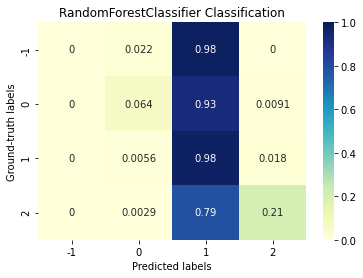

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5, n_estimators=100)
train_and_grade(tfidf, rf, X_train, y_train, X_valid, y_valid)

              precision    recall  f1-score   support

          -1       0.34      0.23      0.27       226
           0       0.47      0.29      0.36       440
           1       0.66      0.85      0.74      1601
           2       0.70      0.47      0.56       699

    accuracy                           0.63      2966
   macro avg       0.54      0.46      0.48      2966
weighted avg       0.62      0.63      0.61      2966



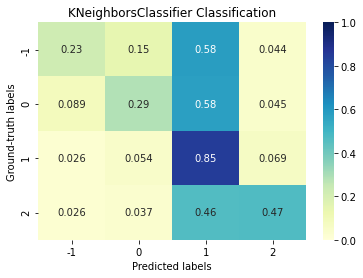

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
train_and_grade(tfidf, knn, X_train, y_train, X_valid, y_valid)

              precision    recall  f1-score   support

          -1       0.27      0.58      0.37       226
           0       0.40      0.44      0.42       440
           1       0.80      0.55      0.65      1601
           2       0.59      0.76      0.66       699

    accuracy                           0.59      2966
   macro avg       0.52      0.58      0.53      2966
weighted avg       0.65      0.59      0.60      2966



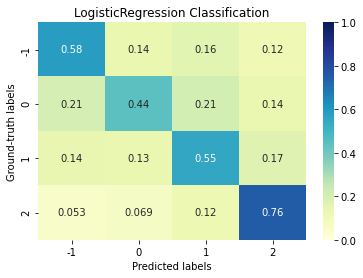

In [51]:
logreg = LogisticRegression(C=1, class_weight="balanced", max_iter=1000)
train_and_grade(tfidf, logreg, X_train, y_train, X_valid, y_valid)

              precision    recall  f1-score   support

          -1       0.32      0.45      0.38       226
           0       0.44      0.36      0.40       440
           1       0.75      0.69      0.72      1601
           2       0.63      0.73      0.68       699

    accuracy                           0.63      2966
   macro avg       0.54      0.56      0.54      2966
weighted avg       0.64      0.63      0.64      2966



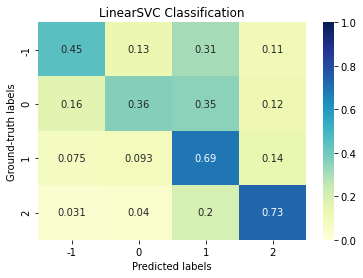

In [53]:
from sklearn.svm import LinearSVC
svm_lsvc = LinearSVC(class_weight="balanced")
train_and_grade(tfidf, svm_lsvc, X_train, y_train, X_valid, y_valid)

              precision    recall  f1-score   support

          -1       0.50      0.02      0.03       226
           0       0.65      0.16      0.26       440
           1       0.65      0.91      0.76      1601
           2       0.70      0.61      0.65       699

    accuracy                           0.66      2966
   macro avg       0.62      0.42      0.42      2966
weighted avg       0.65      0.66      0.60      2966



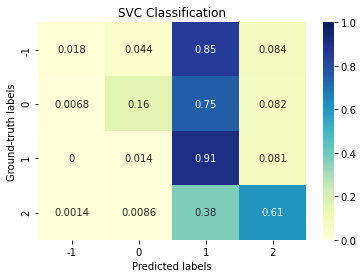

In [54]:
from sklearn.svm import SVC
svm_lsvc2 = SVC(kernel="linear", C=1)
train_and_grade(tfidf, svm_lsvc2, X_train, y_train, X_valid, y_valid)

              precision    recall  f1-score   support

          -1       0.82      0.12      0.21       226
           0       0.68      0.22      0.33       440
           1       0.67      0.91      0.77      1601
           2       0.73      0.65      0.69       699

    accuracy                           0.69      2966
   macro avg       0.73      0.47      0.50      2966
weighted avg       0.70      0.69      0.64      2966



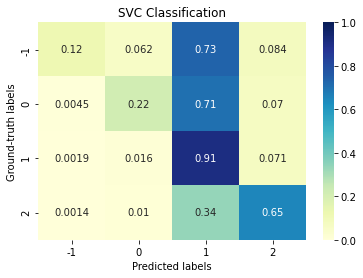

In [55]:
svm_vcg = SVC(gamma=2, C=1)
train_and_grade(tfidf, svm_vcg, X_train, y_train, X_valid, y_valid)

              precision    recall  f1-score   support

          -1       0.25      0.10      0.14       226
           0       0.44      0.21      0.28       440
           1       0.64      0.78      0.71      1601
           2       0.57      0.59      0.58       699

    accuracy                           0.60      2966
   macro avg       0.48      0.42      0.43      2966
weighted avg       0.57      0.60      0.57      2966



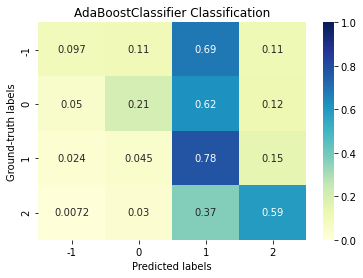

In [59]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
ada_b = AdaBoostClassifier()
train_and_grade(tfidf, ada_b, X_train, y_train, X_valid, y_valid)

## How/why is the model bad?

Do you have any hypotheses as to how you can improve the model further? Use this space to investigate with mindful EDA if necessary.

In [135]:
# EDA
News = train[train['sentiment']==2]
Pro = train[train['sentiment']==1]
Neutral = train[train['sentiment']==0]
Anti = train[train['sentiment']==-1]


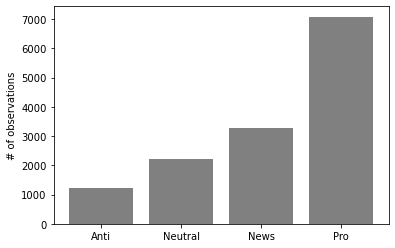

In [137]:
labels = train['sentiment'].unique()
heights = [len(News),len(Pro), len(Neutral),len(Anti)]
plt.bar(labels,heights,color='grey')
plt.xticks(labels,['News','Pro', 'Neutral', 'Anti'])
plt.ylabel("# of observations")
plt.show()

When first investigating the data, we can see that the tweets diplaying pro sentiments far outnumbered the rest of the data. Data balancing was atempted with minimal change in accuracy though, so in the end I decided not to downsample.

I then went through several itterations of data cleaning, trying to remove first the basics, and then punctuation, changing any URL instead or removing them and got slight variations in my results, but seldom a significant improvement.

From the confusion matix results I could see that most og the models I tested were struggling with the neutral and negative, which amde sense as these had the least maount of test data.Then I stumbled apon the LinearSVC model from an atricle on Kagle that I mentioned earlier and from the confusion matric and f1 score I saw my first decent results. They were better then the logistic regresion, but again only by a small margin. After several frustrating hours of tweaking, I decided to start over from scratch (this was after I went through a complete GRU Bi-directional neural network example as a change of pace, which I will not include in this report as it is out of scope, but it was very interesting - https://edwardcqian.medium.com/using-machine-learning-to-measure-user-sentiment-towards-climate-change-d817c21c5887).

Finally, after reverting all my data cleaning, I took the raw data and fit it to my linear SVC model did I get a breakthrough and realize that I was making some mistakes with my data cleaning.

In [ ]:
# write csv for best predictions


In [56]:
test_clean = deepcopy(test)
test_clean["message"] = test_clean["message"].apply(cleaner)
test_clean = lemmatizer(test_clean)

In [57]:
test_clean.head()

,message,tweetid,length,tokenized,parts-of-speech,lemmatized
0,europe will now be looking to china to make su...,169760,98,"[europe, will, now, be, looking, to, china, to...","[(europe, n), (will, n), (now, r), (be, v), (l...",europe will now be look to china to make sure ...
1,combine this with the polling of staffers re c...,35326,107,"[combine, this, with, the, polling, of, staffe...","[(combine, n), (this, n), (with, n), (the, n),...",combine this with the polling of staffer re cl...
2,the scary unimpeachable evidence that climate ...,224985,69,"[the, scary, unimpeachable, evidence, that, cl...","[(the, n), (scary, a), (unimpeachable, a), (ev...",the scary unimpeachable evidence that climate ...
3,putin got to you too jill trump doesn t believ...,476263,91,"[putin, got, to, you, too, jill, trump, doesn,...","[(putin, n), (got, v), (to, n), (you, n), (too...",putin get to you too jill trump doesn t believ...
4,rt female orgasms cause global warming -sarcas...,872928,60,"[rt, female, orgasms, cause, global, warming, ...","[(rt, a), (female, a), (orgasms, n), (cause, n...",rt female orgasm cause global warming -sarcast...


In [60]:
test_vec = tfidf.transform(test_clean['tokenized'])
test_data = test_vec.toarray()
pred_submit = svm_lsvc.predict(test_data)

In [61]:
df_predictions = pd.DataFrame(pred_submit, columns=['sentiment'])
ids_submit = test[['tweetid']]
submit_all = pd.concat([ids_submit.reset_index(drop=True), df_predictions], axis=1)

In [62]:
submit_all

,tweetid,sentiment
0,169760,0
1,35326,2
2,224985,0
3,476263,2
4,872928,0
...,...,...
10541,895714,1
10542,875167,0
10543,78329,0
10544,867455,2


In [63]:
submit_all.to_csv(r'submission.csv', index = False)